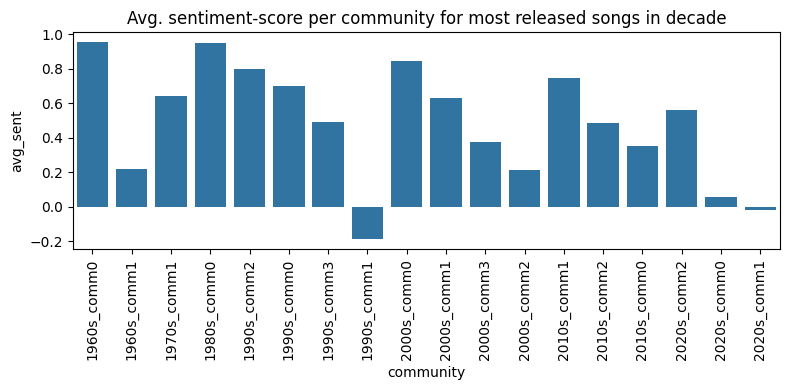

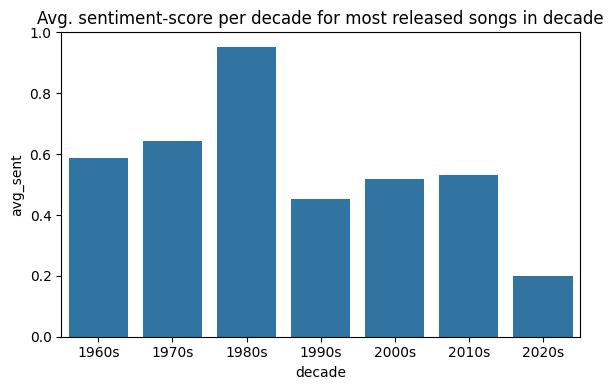

In [ ]:
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

COMM_LYRICS_DIR = "community_lyrics_ovh"  
sia = SentimentIntensityAnalyzer()

rows = []
for fname in os.listdir(COMM_LYRICS_DIR):
    if not fname.endswith("_lyrics.csv"):
        continue
    label = fname.replace("_lyrics.csv","")
    df = pd.read_csv(os.path.join(COMM_LYRICS_DIR, fname))

    scores = df["lyrics"].apply(lambda txt: sia.polarity_scores(txt)["compound"])
    rows.append({
        "community": label,
        "n_songs":   len(scores),
        "avg_sent":  scores.mean()
    })

sent_df = pd.DataFrame(rows)
sent_df.to_csv("community_sentiment.csv", index=False, encoding="utf-8")

sent_df["decade"] = sent_df["community"].str[:4] + "s"
fig, ax = plt.subplots(figsize=(8,4))

order = sent_df.sort_values(["decade","avg_sent"], ascending=[True,False])["community"]
import seaborn as sns
sns.barplot(x="community", y="avg_sent", data=sent_df, order=order, ax=ax)
plt.xticks(rotation=90)
plt.title("Avg. sentiment‐score per community for most released songs in decade")
plt.tight_layout()
plt.show()

decade_df = sent_df.groupby("decade")["avg_sent"].mean().reset_index()
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="decade", y="avg_sent", data=decade_df, ax=ax)
plt.title("Avg. sentiment‐score per decade for most released songs in decade")
plt.tight_layout()
plt.show()